# Fase 3

Daniel Humberto Meneses Ortiz A01747963

David Clemente Carlos A01753740

Adriel Jael Santamaría Hernández A01753918

Eduardo Vargas Soria A01754700

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#Definimos las variables para la simulación

tiempo_lim = 30 ##límite de tiempo
tiempo = []   #array para aumentar el tiempo
presas = []  #array para evolución temporal número de presas
depred = [] #array para evolución temporal número de depredadores
pp = 50.0  #número inicial de presas
dd = 100.0 #número inicial de depredadores

##constantes para calcular los rates
c1 = 1.0
c2 = 0.005
c3 = 0.6

currTime = 0 #tiempo actual
t0 = 0

while (currTime < tiempo_lim):
    if ((pp > 0) & (dd > 0)): #Proceso A
        rate1 = c1 * pp
        rate2 = c2 * pp * dd
        rate3 = c3 * dd
        rate = rate1 + rate2 + rate3
        p1 = rate1/rate
        p2 = rate2/rate
        p3 = rate3/rate

        tn = np.random.exponential(1/rate)
        ganador = np.random.multinomial(1,[p1,p2,p3])

        if ganador[1] == 1: 
            pp -= 1
            dd += 1
            presas.append(pp)
            depred.append(dd)

        if ganador[0] == 1:     
            pp += 1
            presas.append(pp)
            depred.append(dd)
            
        if (ganador[2] == 1):   
            dd -= 1
            presas.append(pp)
            depred.append(dd)

    currTime += tn
    tiempo.append(currTime)

    if ((pp > 0) & (dd == 0)):  #Proceso B
        rate = c1 * pp
        tn = np.random.exponential(1/rate)

        pp += 1
        
        presas.append(pp)
        depred.append(dd)

        currTime += tn
        tiempo.append(currTime)

    if ((dd  > 0) & (pp == 0)): #Proceso C
        rate = c3 * dd
        tn = np.random.exponential(1/rate)

        dd -= 1

        presas.append(pp)
        depred.append(dd)

        currTime += tn
        tiempo.append(currTime)

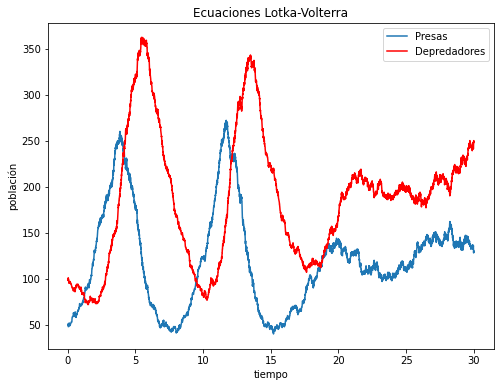

In [ ]:
fig, ax = plt.subplots(figsize = (8, 6))
ax.plot(tiempo, presas, label = "Presas")
ax.plot(tiempo, depred, color = "red", label = "Depredadores")
ax.set_xlabel("tiempo")
ax.set_ylabel("población")
ax.set_title("Ecuaciones Lotka-Volterra")
ax.legend(loc = "best")
plt.show()

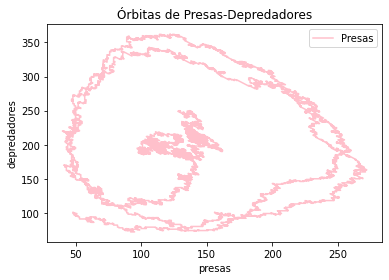

In [ ]:
plt.plot(presas, depred,  label = "Presas", color = "pink")
plt.xlabel('presas')
plt.ylabel('depredadores')
plt.title("Órbitas de Presas-Depredadores")
plt.legend(loc='best')
plt.show()